# SUPERMARKET SALES

My goal is to  improve the formatting and presentability of the information in the sheet. 

In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [25]:
data = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [26]:
#to find the ranges of mean medain SD max min
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


Finding the unique element of every column

In [27]:
#how many different branches
branches = data['Branch'].unique().tolist()
print('There are {} branches as followed\n{}'.format(len(branches), branches))

There are 3 branches as followed
['A', 'C', 'B']


In [28]:
location = data['City'].unique().tolist()
print('There are {} city are followed\n{}'.format(len(location), location))

There are 3 city are followed
['Yangon', 'Naypyitaw', 'Mandalay']


In [29]:
#product line
products = data['Product line'].unique().tolist()
print('There are {} categories of products\n{}'.format(len(products), products))

There are 6 categories of products
['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']


In [30]:
#payment
payment = data['Payment'].unique().tolist()
print('There are {} ways of payment\n{}'.format(len(payment), payment))

There are 3 ways of payment
['Ewallet', 'Cash', 'Credit card']


In [31]:

# Is there one branch per city ?
for city in data['City'].unique().tolist():
    temp_data = data[data['City'] == city]
    branch_per_city = temp_data['Branch'].unique().tolist()
    print('{} has {} branch(es): {}'.format(city, len(branch_per_city), branch_per_city))

Yangon has 1 branch(es): ['A']
Naypyitaw has 1 branch(es): ['C']
Mandalay has 1 branch(es): ['B']


Branch
B    106197.6720
A    106200.3705
C    110568.7065
Name: Total, dtype: float64


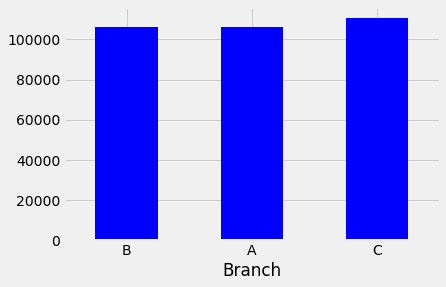

In [32]:
# Most income
income_per_branch = data.groupby('Branch')['Total'].sum()
income_per_branch = income_per_branch.sort_values()
print(income_per_branch)
income_per_branch.plot.bar(x='Branch', rot=0, color= 'blue');


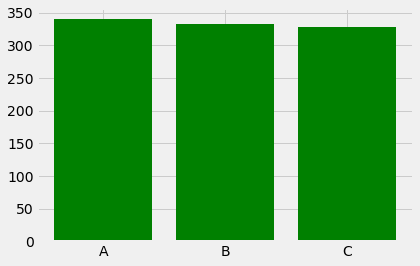

In [33]:
#Most invoice
invoice_per_branch = data.groupby(['Branch']).size().reset_index(name='Counts')
plt.bar('Branch', 'Counts', data= invoice_per_branch, color= 'green');


All 3 branches have a quite similar income around 110k
Branch C seems to have less invoices but make higher income than the two others.

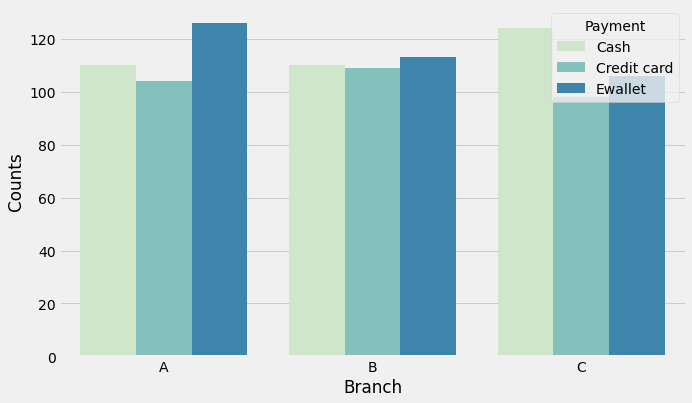

In [34]:
# Payment ways
paym_branch = data.groupby(['Branch', 'Payment']).size().reset_index(name='Counts')

plt.figure(figsize=(10, 6))
sb.barplot(x="Branch", y="Counts", hue="Payment", data=paym_branch, ci=None, palette="GnBu");

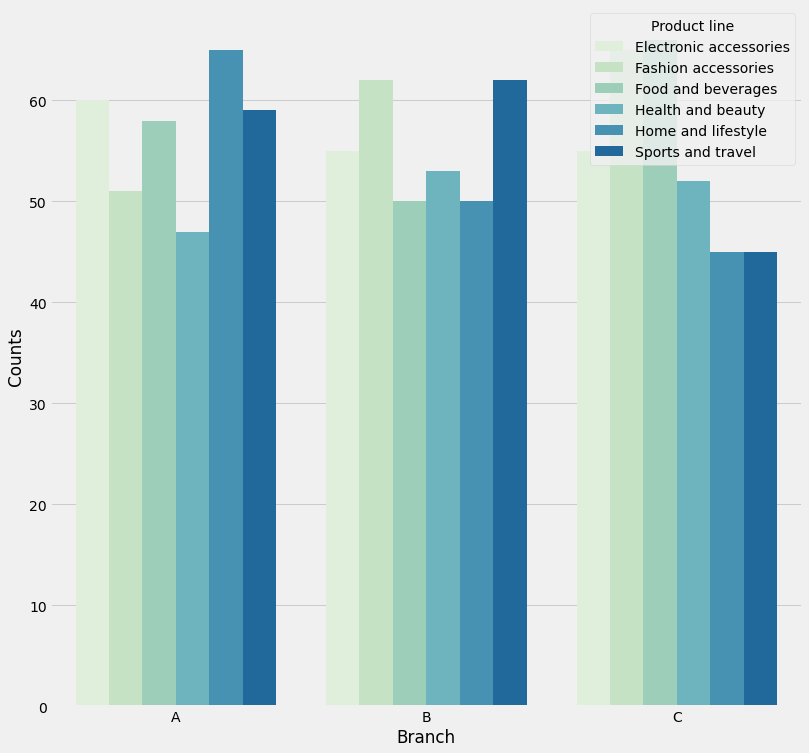

In [35]:
# Categories per branch
cat_branch = data.groupby(['Branch', 'Product line']).size().reset_index(name='Counts')

plt.figure(figsize=(12, 12))
sb.barplot(x="Branch", y="Counts", hue="Product line", data=cat_branch, ci=None, palette="GnBu");

# Question 2: Identify the revenue share of diffferent product lines and present it in form of a pie chart.

Total Revenue = number of unit sold * cost per unit

In [36]:
data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [37]:
#product line
products = data['Product line'].unique().tolist()
print('There are {} categories of products\n{}'.format(len(products), products))

There are 6 categories of products
['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']


In [38]:
data.groupby(['Product line']).agg({'Total':'sum'})


,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


In [39]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [40]:
# revenue = cogs + gross income
data['revenue'] = data['cogs'] + data['gross income']

In [41]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785


In [42]:
data.groupby(['Product line']).agg({'Total':'sum'})

,Total
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


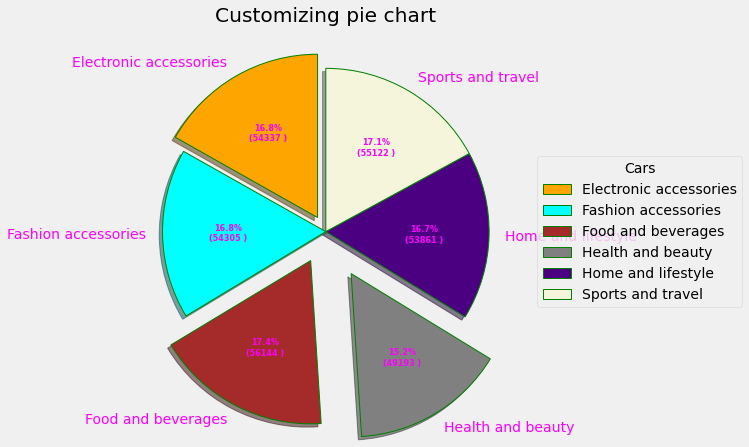

In [43]:
# Creating dataset
cars = ['Electronic accessories', 'Fashion accessories', 'Food and beverages',
        'Health and beauty', 'Home and lifestyle', 'Sports and travel']
 
data = [54337.5315, 54305.8950, 56144.8440, 49193.7390, 53861.9130, 55122.8265]
 
 
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, cars,
          title ="Cars",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
 
# show plot
plt.show()
    

        
